In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from keras.utils import np_utils
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, MaxPooling2D, AveragePooling2D
from keras.optimizers import Adam
import glob
from PIL import Image

import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import np_utils
from keras.layers.core import Flatten, Dense, Dropout, Lambda


Using TensorFlow backend.


In [2]:
def plots(ims, figsize=(12,6), rows=1, interp=False, titles=None):
    if type(ims[0]) is np.ndarray:
        ims = np.array(ims).astype(np.uint8)
        if (ims.shape[-1] != 3):
            ims = ims.transpose((0,2,3,1))
    f = plt.figure(figsize=figsize)
    for i in range(len(ims)):
        sp = f.add_subplot(rows, len(ims)//rows, i+1)
        sp.axis('Off')
        if titles is not None:
            sp.set_title(titles[i], fontsize=16)
        plt.imshow(ims[i], interpolation=None if interp else 'none')

In [3]:
from keras.preprocessing import image

BATCH_SIZE = 64
PATH="data/sample/"

def get_fit_sample():
    gen = image.ImageDataGenerator()
    sample_batches = gen.flow_from_directory(PATH+'valid', target_size=(224,224), 
            class_mode='categorical', shuffle=False, batch_size=200)
    imgs, labels = next(sample_batches)
    return imgs

gen = image.ImageDataGenerator(featurewise_std_normalization=True)
gen.fit(get_fit_sample())
val_batches = gen.flow_from_directory(PATH+'valid', target_size=(224,224), 
            class_mode='categorical', shuffle=True, batch_size=BATCH_SIZE)

gen = image.ImageDataGenerator(featurewise_std_normalization=True)
gen.fit(get_fit_sample())
batches = gen.flow_from_directory(PATH+'train', target_size=(224,224), 
            class_mode='categorical', shuffle=True, batch_size=BATCH_SIZE)

#imgs,labels = next(batches)
#plots(imgs[:2])


Found 200 images belonging to 2 classes.
Found 200 images belonging to 2 classes.
Found 200 images belonging to 2 classes.
Found 200 images belonging to 2 classes.


In [4]:


CLASSES = 2
INPUT_SHAPE = (224,224,3)
model = Sequential()
    
# Block 1
model.add(Conv2D(64, (3, 3), activation='relu', padding='same', name='block1_conv1', input_shape=INPUT_SHAPE))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same', name='block1_conv2'))
model.add(MaxPooling2D((2, 2), strides=(2, 2), name='block1_pool'))

# Block 2
model.add(Conv2D(128, (3, 3), activation='relu', padding='same', name='block2_conv1'))
model.add(Conv2D(128, (3, 3), activation='relu', padding='same', name='block2_conv2'))
model.add(MaxPooling2D((2, 2), strides=(2, 2), name='block2_pool'))

# Block 3
model.add(Conv2D(256, (3, 3), activation='relu', padding='same', name='block3_conv1'))
model.add(Conv2D(256, (3, 3), activation='relu', padding='same', name='block3_conv2'))
model.add(Conv2D(256, (3, 3), activation='relu', padding='same', name='block3_conv3'))
model.add(MaxPooling2D((2, 2), strides=(2, 2), name='block3_pool'))

# Block 4
model.add(Conv2D(512, (3, 3), activation='relu', padding='same', name='block4_conv1'))
model.add(Conv2D(512, (3, 3), activation='relu', padding='same', name='block4_conv2'))
model.add(Conv2D(512, (3, 3), activation='relu', padding='same', name='block4_conv3'))
model.add(MaxPooling2D((2, 2), strides=(2, 2), name='block4_pool'))

# Block 5
model.add(Conv2D(512, (3, 3), activation='relu', padding='same', name='block5_conv1'))
model.add(Conv2D(512, (3, 3), activation='relu', padding='same', name='block5_conv2'))
model.add(Conv2D(512, (3, 3), activation='relu', padding='same', name='block5_conv3'))
model.add(MaxPooling2D((2, 2), strides=(2, 2), name='block5_pool'))

# Classification block
model.add(Flatten(name='flatten'))
model.add(Dense(4096, activation='relu', name='fc1'))
model.add(Dropout(0.5))
model.add(Dense(4096, activation='relu', name='fc2'))
model.add(Dropout(0.5))
model.add(Dense(CLASSES, activation='softmax', name='predictions'))

from keras.optimizers import SGD
sgd = SGD(lr=0.01, decay=0.0005, momentum=0.9, nesterov=False)


model.compile(optimizer=sgd, loss='mean_squared_error', metrics=['accuracy'])

Epoch 1/10
10/10 [==============================] - 11s - loss: 0.2498 - acc: 0.5013 - val_loss: 0.2503 - val_acc: 0.4697
Epoch 2/10
10/10 [==============================] - 11s - loss: 0.2497 - acc: 0.5314 - val_loss: 0.2508 - val_acc: 0.4659
Epoch 3/10
10/10 [==============================] - 10s - loss: 0.2502 - acc: 0.5110 - val_loss: 0.2510 - val_acc: 0.4564
Epoch 4/10
10/10 [==============================] - 11s - loss: 0.2491 - acc: 0.5294 - val_loss: 0.2525 - val_acc: 0.4716
Epoch 5/10
10/10 [==============================] - 10s - loss: 0.2511 - acc: 0.4847 - val_loss: 0.2501 - val_acc: 0.4886
Epoch 6/10
10/10 [==============================] - 11s - loss: 0.2495 - acc: 0.5072 - val_loss: 0.2503 - val_acc: 0.4678
Epoch 7/10
10/10 [==============================] - 10s - loss: 0.2504 - acc: 0.5097 - val_loss: 0.2516 - val_acc: 0.4678
Epoch 8/10
10/10 [==============================] - 11s - loss: 0.2463 - acc: 0.5573 - val_loss: 0.2554 - val_acc: 0.4754
Epoch 9/10
10/10 [======

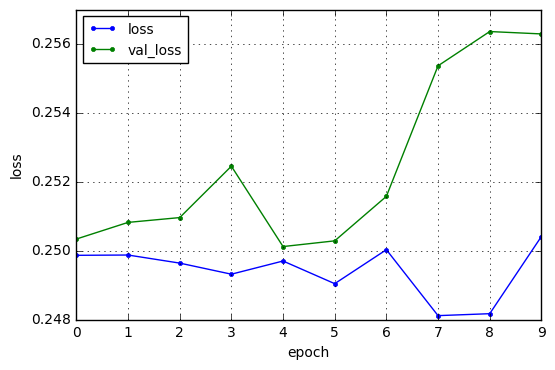

CPU times: user 1min 18s, sys: 11.8 s, total: 1min 30s
Wall time: 1min 53s


In [7]:
%%time
hist = model.fit_generator(batches,  steps_per_epoch=10, epochs=10, validation_data=val_batches, validation_steps=10)
 
model.save('ConvNet-D-vgg16-sample.h5')

# http://qiita.com/TypeNULL/items/4e4d7de11ab4361d6085
loss = hist.history['loss']
val_loss = hist.history['val_loss']
nb_epoch = len(loss)
plt.plot(range(nb_epoch), loss, marker='.', label='loss')
plt.plot(range(nb_epoch), val_loss, marker='.', label='val_loss')
plt.legend(loc='best', fontsize=10)
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()